In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
rng = np.random.RandomState(1) 
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T 
plt.scatter(X[:, 0], X[:, 1]) 
plt.axis('equal');

In [3]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
pca.fit(X)

PCA(n_components=2)

In [4]:
print(pca.components_)
print(pca.explained_variance_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


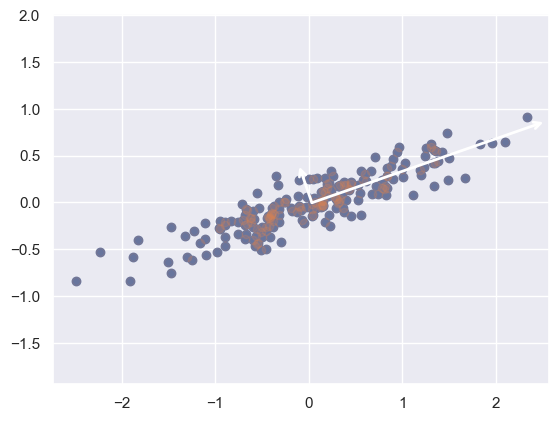

In [5]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()  # Si no se proporciona un eje, usa el actual
    arrowprops = dict(arrowstyle='->',
                      linewidth=2,
                      shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# Graficar los datos
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

# Dibujar los vectores principales
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')
plt.show()

In [6]:
pca = PCA(n_components=1) 
pca.fit(X) 
X_pca = pca.transform(X) 
print("original shape: ", X.shape) 
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


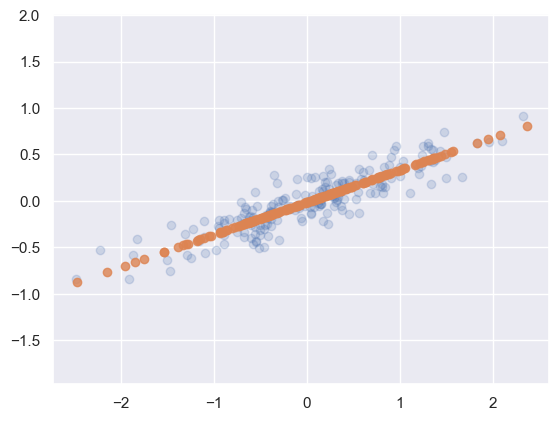

In [7]:
X_new = pca.inverse_transform(X_pca) 
plt.scatter(X[:, 0], X[:, 1], alpha=0.2) 
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8) 
plt.axis('equal');
plt.show()

In [8]:
from sklearn.datasets import load_digits 
digits = load_digits() 
digits.data.shape

(1797, 64)

In [9]:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data) 
print(digits.data.shape) 
print(projected.shape)

(1797, 64)
(1797, 2)


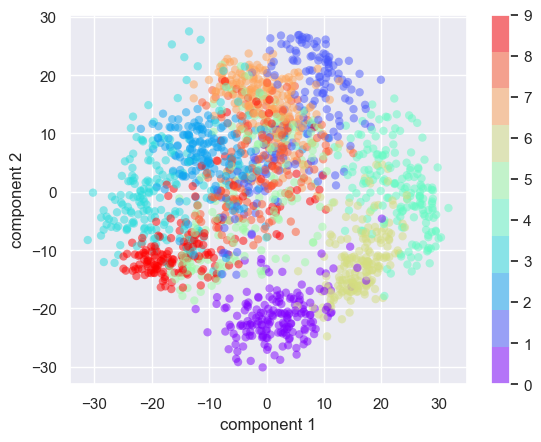

In [10]:
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, 
            edgecolor='none', alpha=0.5, cmap=plt.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

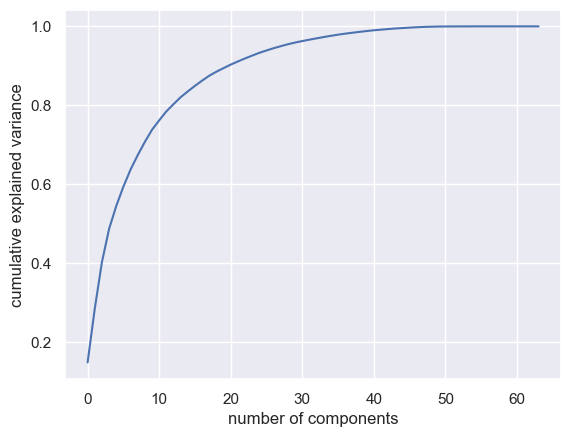

In [11]:
pca = PCA().fit(digits.data) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');
plt.show()

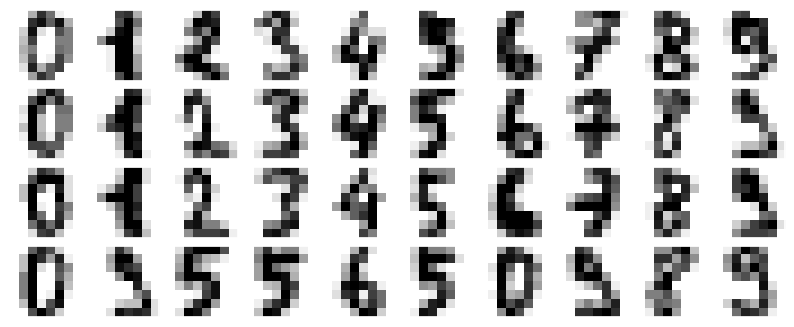

In [12]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
        subplot_kw={'xticks':[], 'yticks':[]},
        gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
            cmap='binary', interpolation='nearest',
            clim=(0, 16))

plot_digits(digits.data)
plt.show()

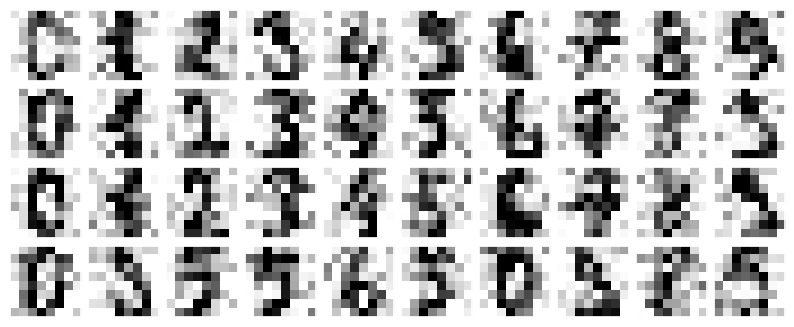

In [13]:
np.random.seed(42) 
noisy = np.random.normal(digits.data, 4) 
plot_digits(noisy)
plt.show()

In [14]:
pca = PCA(0.50).fit(noisy) 
pca.n_components_

12

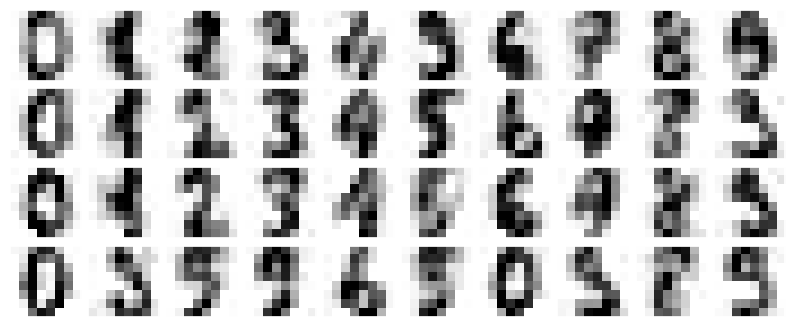

In [15]:
components = pca.transform(noisy) 
filtered = pca.inverse_transform(components) 
plot_digits(filtered)
plt.show()

In [16]:
from sklearn.datasets import fetch_lfw_people 
faces = fetch_lfw_people(min_faces_per_person=60) 
print(faces.target_names) 
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


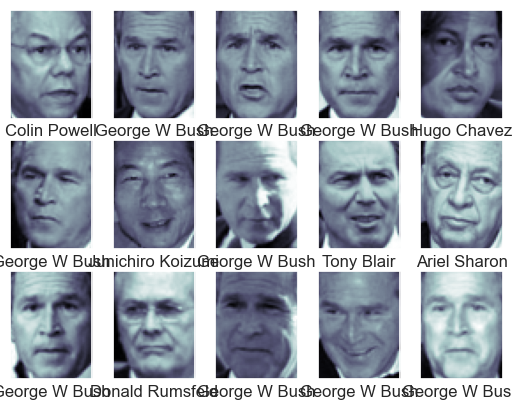

In [17]:
fig, ax = plt.subplots(3, 5) 
for i, axi in enumerate(ax.flat): 
    axi.imshow(faces.images[i], cmap='bone') 
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])
plt.show()

In [18]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [19]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, test_size=0.2, random_state=42)

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: total: 50.1 s
Wall time: 23.1 s
{'svc__C': 1, 'svc__gamma': 0.005}


In [21]:
model = grid.best_estimator_ 
yfit = model.predict(Xtest)

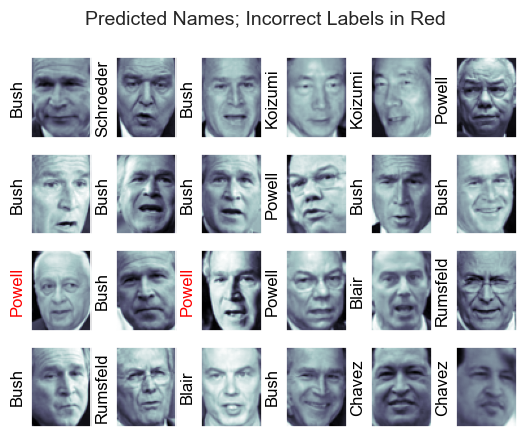

In [22]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
        color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);
plt.show()

In [23]:
from sklearn.metrics import classification_report 
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.90      0.75      0.82        12
     Colin Powell       0.72      0.94      0.81        51
  Donald Rumsfeld       0.88      0.88      0.88        25
    George W Bush       0.97      0.88      0.92        98
Gerhard Schroeder       0.88      0.71      0.79        21
      Hugo Chavez       0.85      0.73      0.79        15
Junichiro Koizumi       1.00      1.00      1.00        10
       Tony Blair       0.90      0.92      0.91        38

         accuracy                           0.87       270
        macro avg       0.89      0.85      0.86       270
     weighted avg       0.89      0.87      0.88       270



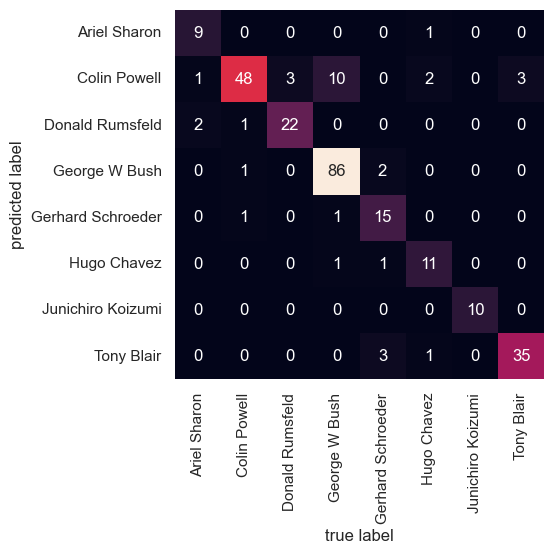

In [24]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
    xticklabels=faces.target_names,
    yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()

In [25]:
from sklearn.decomposition import PCA
pca = PCA(150)
pca.fit(faces.data)

PCA(n_components=150)

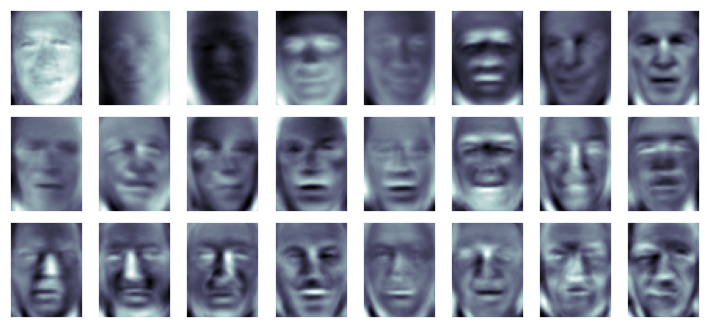

In [26]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
plt.show()

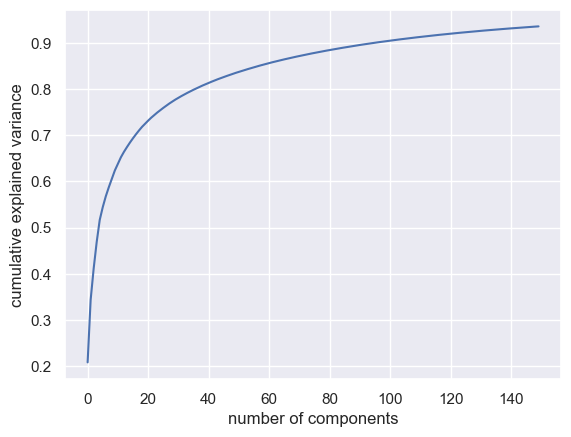

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance');
plt.show()

In [28]:
# Compute the components and projected faces
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

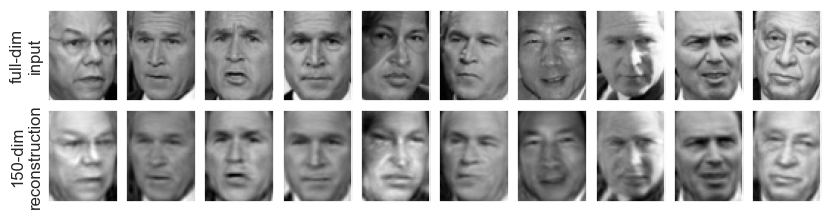

In [29]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');
plt.show()

## K-means clustering

In [31]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
import numpy as np

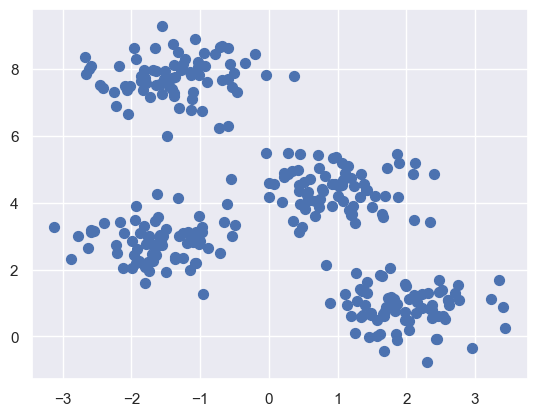

In [32]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, 
random_state=0) 
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.show()

In [33]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X) 
y_kmeans = kmeans.predict(X)

C:\Users\0020802\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


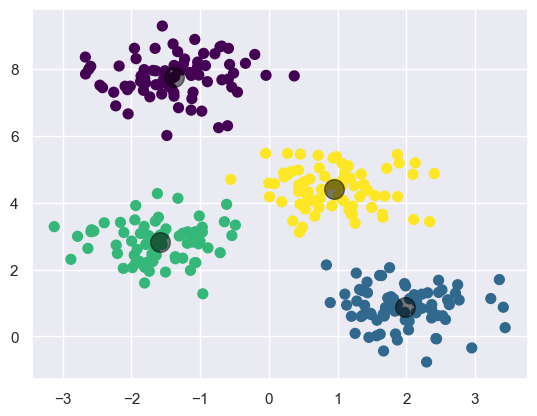

In [34]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis') 
centers = kmeans.cluster_centers_ 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [35]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=4) 
kmeans.fit(X) 
y_kmeans = kmeans.predict(X)

C:\Users\0020802\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


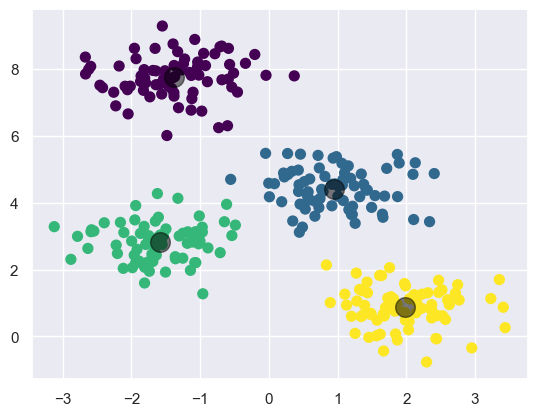

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis') 
centers = kmeans.cluster_centers_ 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

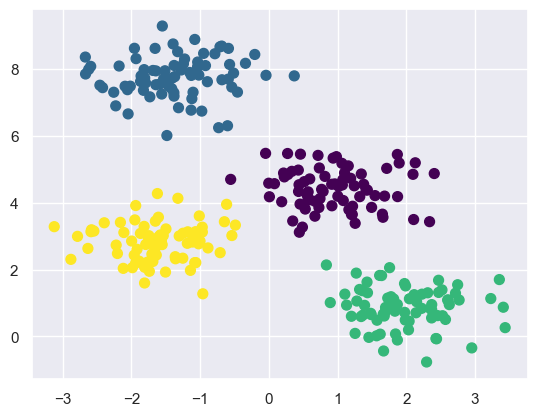

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin  # ✅ Importar la función

def find_clusters(X, n_clusters, rseed=2):
    # 1. Elegir aleatoriamente los centros iniciales
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Asignar etiquetas basadas en el centro más cercano
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Encontrar nuevos centros a partir de la media de los puntos
        new_centers = np.array([X[labels == j].mean(0) for j in range(n_clusters)])

        # 2c. Verificar convergencia
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

# Crear clusters y graficar
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.show()  # ✅ Agregar para mostrar la gráfica


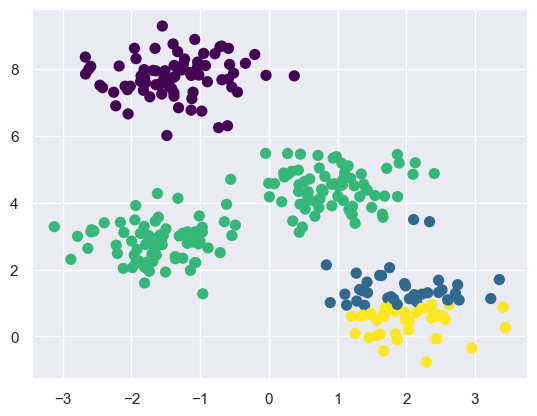

In [38]:
centers, labels = find_clusters(X, 4, rseed=0) 
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.show()

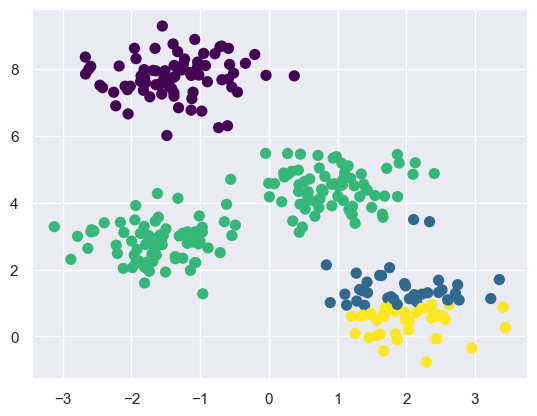

In [39]:
centers, labels = find_clusters(X, 4, rseed=0) 
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.show()

C:\Users\0020802\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


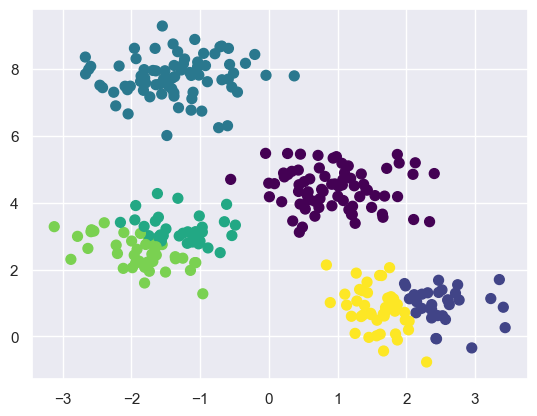

In [40]:
labels = KMeans(6, random_state=0).fit_predict(X) 
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.show()

C:\Users\0020802\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


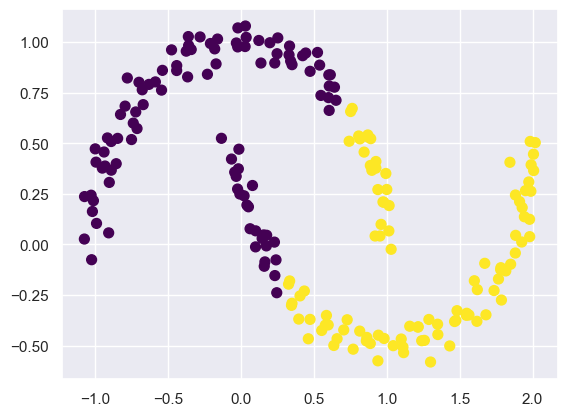

In [41]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X) 
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.show()

C:\Users\0020802\AppData\Local\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\0020802\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


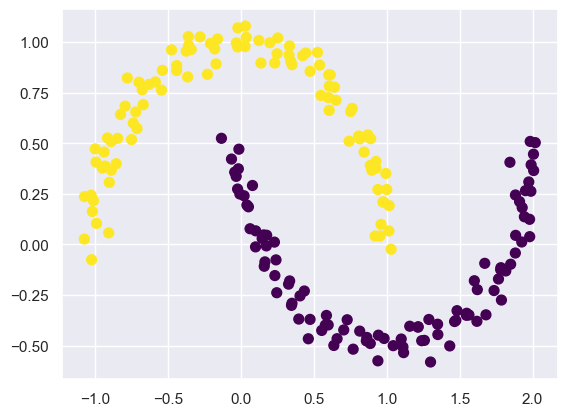

In [42]:
from sklearn.cluster import SpectralClustering 
model = SpectralClustering(n_clusters=2, 
affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X) 
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');
plt.show()

In [43]:
from sklearn.datasets import load_digits
digits = load_digits() 
digits.data.shape

(1797, 64)

In [44]:
kmeans = KMeans(n_clusters=10, random_state=0) 
clusters = kmeans.fit_predict(digits.data) 
kmeans.cluster_centers_.shape

C:\Users\0020802\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


(10, 64)

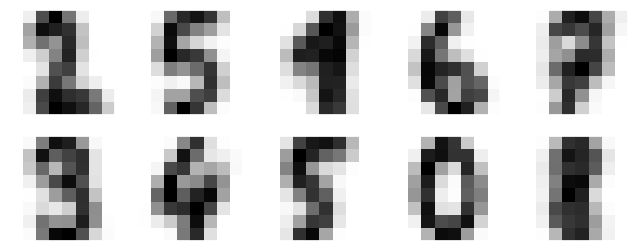

In [45]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3)) 
centers = kmeans.cluster_centers_.reshape(10, 8, 8) 
for axi, center in zip(ax.flat, centers): 
    axi.set(xticks=[], yticks=[]) 
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()

In [46]:
from scipy.stats import mode 
labels = np.zeros_like(clusters) 
for i in range(10): 
    mask = (clusters == i) 
    labels[mask] = mode(digits.target[mask])[0]

In [47]:
from sklearn.metrics import accuracy_score 
accuracy_score(digits.target, labels)

0.7440178074568725

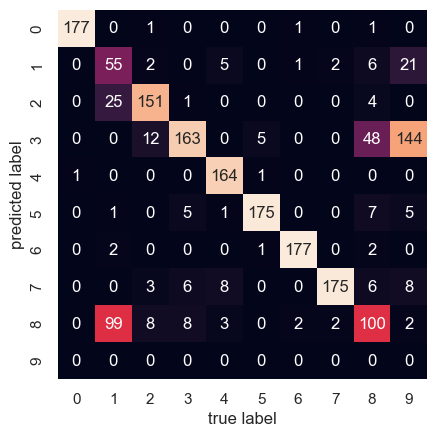

In [48]:
from sklearn.metrics import confusion_matrix 
mat = confusion_matrix(digits.target, labels) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
xticklabels=digits.target_names, yticklabels=digits.target_names) 
plt.xlabel('true label') 
plt.ylabel('predicted label');
plt.show()

## K-means for color compression

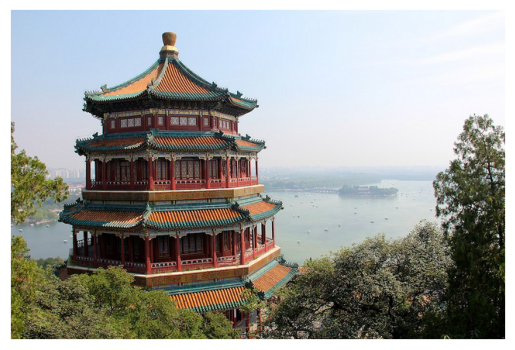

In [112]:
from sklearn.datasets import load_sample_image 
china = load_sample_image("china.jpg") 
ax = plt.axes(xticks=[], yticks=[]) 
ax.imshow(china);
plt.show()

In [114]:
china.shape

(427, 640, 3)

In [116]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3) 
data.shape

(273280, 3)

In [118]:
data

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

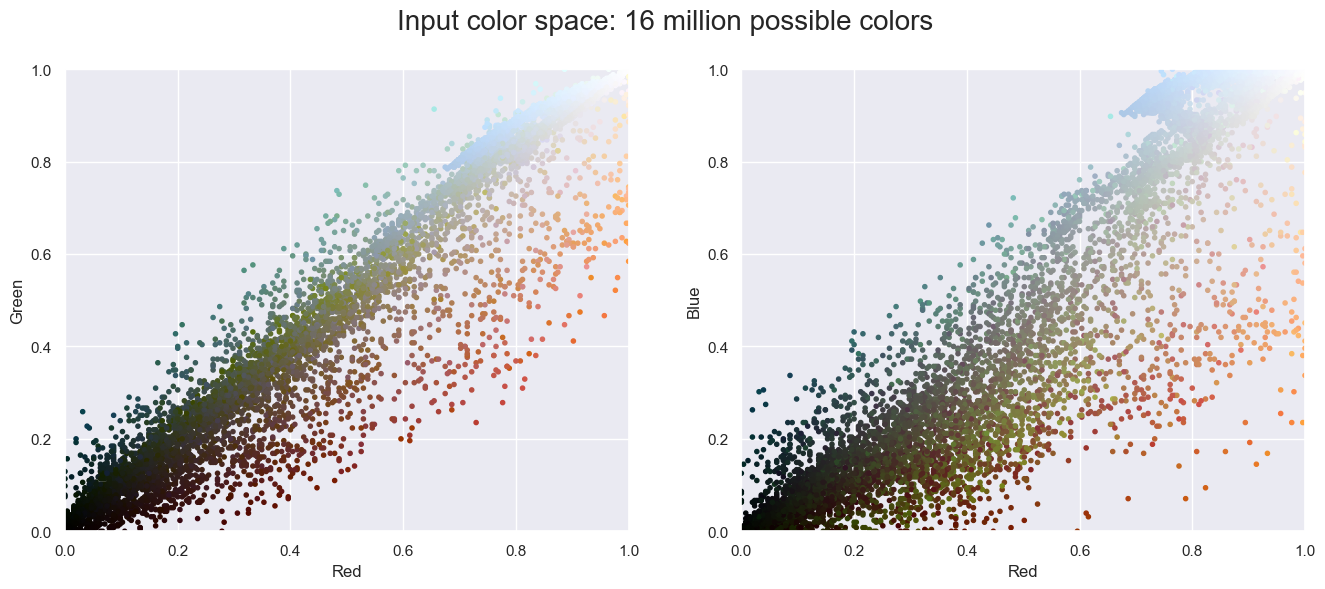

In [120]:
import numpy as np
import matplotlib.pyplot as plt

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]

    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

plot_pixels(data, title='Input color space: 16 million possible colors')
plt.show()

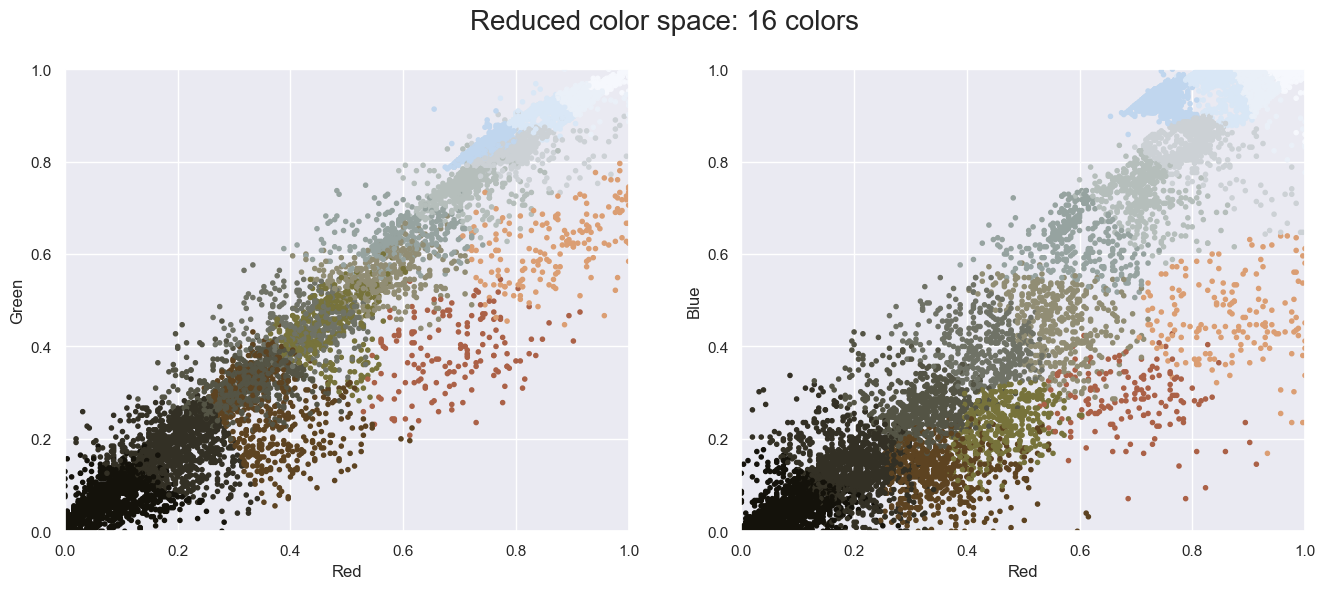

In [54]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
plot_pixels(data, colors=new_colors,
    title="Reduced color space: 16 colors")
plt.show()

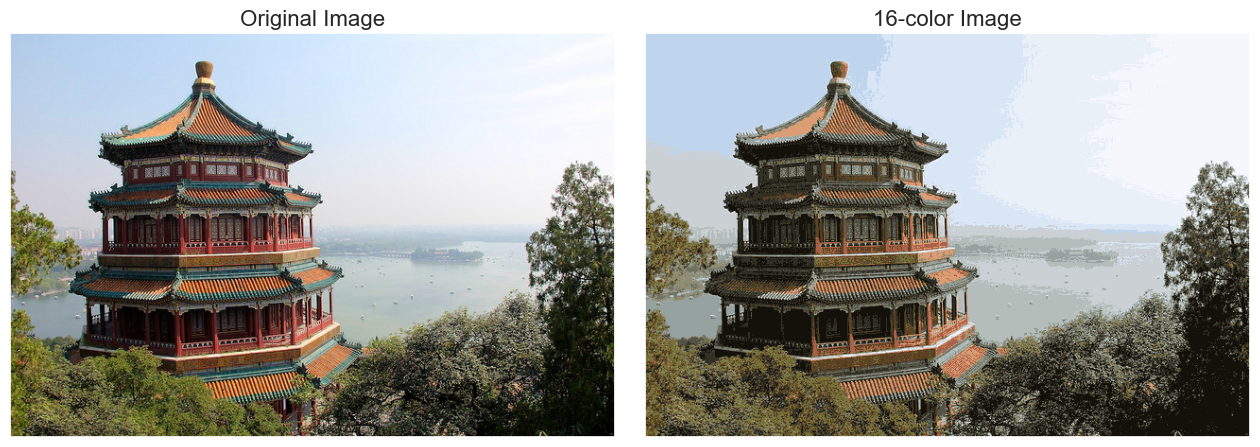

In [55]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6),
    subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);
plt.show()